In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('train.csv')
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [4]:
df1=df.copy()

In [5]:
cols=['maincateg','platform']
df1[cols]=df1[cols].apply(LabelEncoder().fit_transform)
df1.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,1,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,1,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,1,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,0,1,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,0,1,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [6]:
df1['Offer %']=df1['Offer %'].str.replace('%','').astype(float)
df1.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,1,698,999,30.13,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,1,999,1999,50.03,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,1,2749,4999,45.01,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,0,1,518,724,15.85,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,0,1,1379,2299,40.02,77.0,3.0,35.0,21.0,7.0,7,7,1


In [7]:
drcols=['title','price1']
df1.drop(drcols,axis=1,inplace=True)
df1.head()

,id,Rating,maincateg,platform,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,3.9,1,1,999,30.13,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,3.8,0,1,1999,50.03,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,4.4,1,1,4999,45.01,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,4.2,0,1,724,15.85,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,3.9,0,1,2299,40.02,77.0,3.0,35.0,21.0,7.0,7,7,1


In [8]:
df1.fillna(0,inplace=True)
df1. isnull(). sum()

id            0
Rating        0
maincateg     0
platform      0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [9]:
X_train=df1.drop(['Offer %'],axis=1)
y_train=df1['Offer %']

In [10]:
dftest1=pd.read_csv('test.csv')
dftest1.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [11]:
dftest1[cols]=dftest1[cols].apply(LabelEncoder().fit_transform)
dftest1.drop('title',axis=1,inplace=True)
dftest1.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,3.9,1,1,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,3.9,1,1,999,449,52,229.0,70,71,33,46.0,1
3,20677,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1
4,12593,3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0


In [12]:
dftest1.fillna(0,inplace=True)
dftest1. isnull(). sum()

id            0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [13]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)
rfpred=rfreg.predict(dftest1)

In [14]:
dftest1['rfpred']=rfpred
dftest1['price1']=dftest1['actprice1']-(dftest1['actprice1'] * (dftest1['rfpred']/100))
dftest1.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,rfpred,price1
0,2242,3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1,60.5278,394.327278
1,20532,3.9,1,1,499,3015,404,1458.0,657,397,182,321.0,1,42.8185,285.335685
2,10648,3.9,1,1,999,449,52,229.0,70,71,33,46.0,1,55.0317,449.233317
3,20677,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1,61.2907,1160.891907
4,12593,3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0,59.5324,404.271324


In [15]:
rcols=['id','price1']
rfresult = pd.DataFrame(dftest1[rcols], columns = ['id','price1'])
rfresult.to_csv('rfresult.csv',index=False)

In [18]:
from sklearn.model_selection import train_test_split
X=df1.drop(['Offer %'],axis=1)
y=df1['Offer %']
X_train, X_test, y_train ,y_test = train_test_split( X, y, test_size=0.25,  random_state=42 )

In [19]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)
print(mse)
print(rmse)
print(score)

122.56976118796084
11.07112285127217
0.6635305721943847


In [20]:
df.isna().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

<AxesSubplot:>

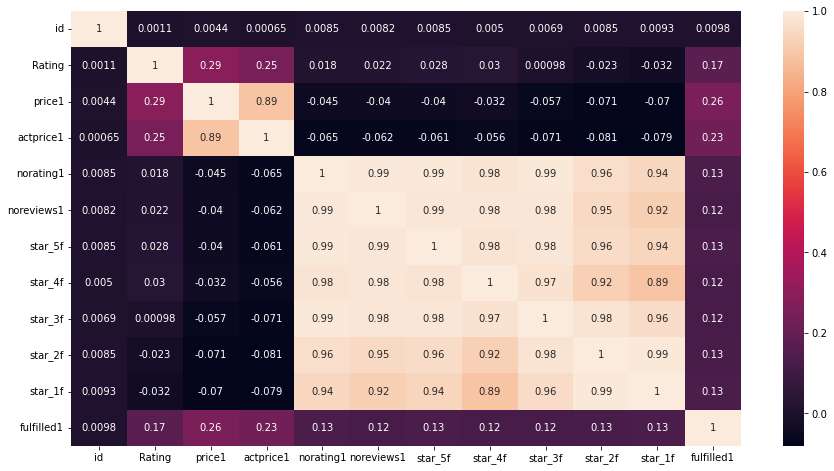

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df.drop(['title', 'maincateg', 'platform'], axis='columns').corr(), annot=True)

In [22]:
df['maincateg'].unique()

array(['Women', 'Men', nan], dtype=object)

In [23]:
df[df['maincateg'].isnull()].head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
19,12336,Women Beige Heels Sandal,4.0,NaN,Flipkart,499,999,50.05%,NaN,NaN,28.0,9.0,10.0,2,5,0
38,20804,"Men Brown, Orange Sports Sandal",4.1,NaN,Flipkart,819,999,18.02%,26640.0,3667.0,14148.0,NaN,NaN,1113,2094,1
68,5575,Women Copper Flats Sandal,4.1,NaN,Flipkart,349,999,65.07%,NaN,27.0,NaN,NaN,22.0,5,15,1
91,4262,Slippers,3.6,NaN,Flipkart,213,249,14.46%,NaN,NaN,NaN,NaN,466.0,281,476,1
116,2767,Ace Slip-On Running Shoes For Men (Black),4.3,NaN,Flipkart,2999,4999,40.01%,NaN,NaN,46.0,27.0,5.0,1,5,1


In [24]:
df.loc[df['title'].str.upper().str.contains('WOMEN') & df['maincateg'].isnull(), 'maincateg'] = 'Women'
df.loc[df['title'].str.upper().str.contains('MEN') & df['maincateg'].isnull(), 'maincateg'] = 'Men'
df[df['maincateg'].isnull()].head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
91,4262,Slippers,3.6,NaN,Flipkart,213,249,14.46%,NaN,NaN,NaN,NaN,466.0,281,476,1
228,18304,Slippers,3.8,NaN,Flipkart,141,499,71.74%,NaN,23.0,71.0,NaN,22.0,14,17,0
728,6801,Slides,3.7,NaN,Flipkart,419,998,58.02%,NaN,4.0,NaN,NaN,NaN,3,4,1
842,19010,Slides,3.9,NaN,Flipkart,2110,2995,29.55%,NaN,1.0,NaN,NaN,0.0,1,1,1
1056,7202,Flip Flops,3.8,NaN,Flipkart,326,499,34.67%,NaN,NaN,NaN,21.0,NaN,2,10,0


In [25]:
df.loc[df['maincateg'].isnull(), 'maincateg'] = 'Unisex'
df.isnull().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [26]:
#Dealing with star_3f null values
ncols=['star_2f','star_1f','star_3f']
xn=df[ncols]
impute_knn = KNNImputer(n_neighbors=2)
dfn=impute_knn.fit_transform(xn)
dfn=pd.DataFrame(dfn,columns=['2f','1f','3f'])
df['star_3f']=dfn['3f']

In [27]:
#Dealing with star_5f null values
ncols=['star_2f','star_1f','star_5f']
xn=df[ncols]
dfn=impute_knn.fit_transform(xn)
dfn=pd.DataFrame(dfn,columns=['2f','1f','5f'])
df['star_5f']=dfn['5f']

In [28]:
#Dealing with star_4f null values
ncols=['star_2f','star_1f','star_4f']
xn=df[ncols]
dfn=impute_knn.fit_transform(xn)
dfn=pd.DataFrame(dfn,columns=['2f','1f','4f'])
df['star_4f']=dfn['4f']

In [29]:
#Dealing with norating1 null values
ncols=['star_2f','star_1f','norating1']
xn=df[ncols]
dfn=impute_knn.fit_transform(xn)
dfn=pd.DataFrame(dfn,columns=['2f','1f','nr1'])
df['norating1']=dfn['nr1']

In [30]:
#Dealing with noreviews1 null values
ncols=['star_2f','star_1f','noreviews1']
xn=df[ncols]
dfn=impute_knn.fit_transform(xn)
dfn=pd.DataFrame(dfn,columns=['2f','1f','nrv1'])
df['noreviews1']=dfn['nrv1']

In [31]:
df. isnull(). sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [32]:
#test data
dft=pd.read_csv('test.csv')
dftid=dft['id']
dft.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [33]:
dft1=dft.copy()

In [34]:
dft.isnull().sum() # checking if there are any null values in test data

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

<AxesSubplot:>

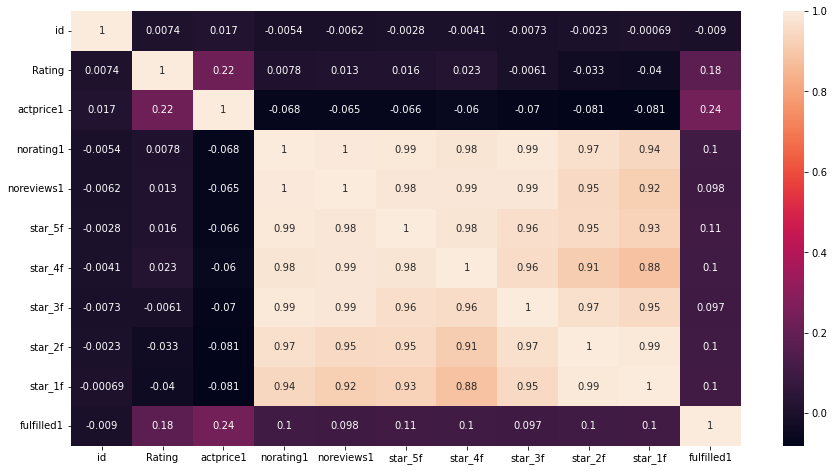

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(dft.drop(['title', 'maincateg', 'platform'], axis='columns').corr(), annot=True)

In [36]:
#Dealing with star_1f null values
ncols=['star_2f','star_3f','star_4f','star_1f']
xnt=dft[ncols]
dfnt=impute_knn.fit_transform(xnt)
dfnt=pd.DataFrame(dfnt,columns=['2f','3f','4f','1f'])
dft['star_1f']=dfnt['1f']

In [37]:
#Dealing with star_5f null values
ncols=['star_2f','star_3f','star_4f','star_5f']
xnt=dft[ncols]
dfnt=impute_knn.fit_transform(xnt)
dfnt=pd.DataFrame(dfnt,columns=['2f','3f','4f','5f'])
dft['star_5f']=dfnt['5f']

In [38]:
dft.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f         0
star_4f         0
star_3f         0
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [39]:
dft.loc[dft['title'].str.upper().str.contains('WOMEN') & dft['maincateg'].isnull(), 'maincateg'] = 'Women'
dft.loc[dft['title'].str.upper().str.contains('MEN') & dft['maincateg'].isnull(), 'maincateg'] = 'Men'
dft.loc[dft['maincateg'].isnull(), 'maincateg'] = 'Unisex'
dft['maincateg'].isnull().sum()

0

In [40]:
#Dealing with rating null values
feature = 'Rating'
simple_imputer_mode_Rating = SimpleImputer(strategy='mean')
simple_imputer_mode_Rating.fit(dft[[feature]])
dft[feature] = simple_imputer_mode_Rating.transform(dft[[feature]])

In [29]:
dft.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [42]:
df['Offer %']=df['Offer %'].str.replace('%','').astype(float)
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02,77.0,3.0,35.0,21.0,7.0,7,7,1


In [43]:
df.drop(['id','title','price1'],axis=1,inplace=True) #Dropping unwanted columns from train data
df.head()

,Rating,maincateg,platform,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,Women,Flipkart,999,30.13,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,Men,Flipkart,1999,50.03,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,Women,Flipkart,4999,45.01,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,Men,Flipkart,724,15.85,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,Men,Flipkart,2299,40.02,77.0,3.0,35.0,21.0,7.0,7,7,1


In [44]:
cols=['maincateg','platform']
df[cols]=df[cols].apply(LabelEncoder().fit_transform) #One hot encoding
df.head()

,Rating,maincateg,platform,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,2,1,999,30.13,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,0,1,1999,50.03,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,2,1,4999,45.01,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,0,1,724,15.85,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,0,1,2299,40.02,77.0,3.0,35.0,21.0,7.0,7,7,1


In [45]:
dft.drop(['id','title'],axis=1,inplace=True) #Dropping unwanted columns from test data
dft.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [46]:
cols=['maincateg','platform']
dft[cols]=dft[cols].apply(LabelEncoder().fit_transform) #One hot encoding
dft.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,2,1,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,2,1,999,449,52,229.0,70,71,33,46.0,1
3,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0


In [47]:
X=df.drop(['Offer %'],axis=1)
y=df['Offer %']
X_train, X_test, y_train ,y_test = train_test_split( X, y, test_size=0.25,  random_state=42 )

In [48]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)
print(mse)
print(rmse)
print(score)

105.31944635091229
10.262526314261624
0.7108848584917015


In [49]:
dft.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,2,1,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,2,1,999,449,52,229.0,70,71,33,46.0,1
3,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0


In [53]:
rfpred=model.predict(dft)
rfpreddf=pd.DataFrame(rfpred,columns=['rfpred'])
rfpreddf['actprice1']=dft['actprice1']
rfpreddf['price1']=rfpreddf['actprice1']-(rfpreddf['actprice1'] * (rfpreddf['rfpred']/100))
rfres = pd.concat([dftid,rfpreddf], axis='columns')
rfres.head()

,id,rfpred,actprice1,price1
0,2242,57.441824,999,425.156180
1,20532,41.943700,499,289.700937
2,10648,53.325400,999,466.279254
3,20677,58.226300,2999,1252.793263
4,12593,59.840874,999,401.189664


In [54]:
rcols=['id','price1']
rfresult = pd.DataFrame(rfres[rcols], columns = ['id','price1'])
print(rfresult.head())
rfresult.to_csv('FRFResult.csv',index=False)

      id       price1
0   2242   425.156180
1  20532   289.700937
2  10648   466.279254
3  20677  1252.793263
4  12593   401.189664


In [55]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)
print(mse)
print(rmse)
print(score)

136.24183270412667
11.672267676168444
0.6259990143666159


In [59]:
xgpred=model.predict(dft)
xgpreddf=pd.DataFrame(xgpred,columns=['xgpred'])
xgpreddf['actprice1']=dft['actprice1']
xgpreddf['price1']=xgpreddf['actprice1']-(xgpreddf['actprice1'] * (xgpreddf['xgpred']/100))
xgres = pd.concat([dftid,xgpreddf], axis='columns')
xgres.head()

,id,xgpred,actprice1,price1
0,2242,59.546906,999,404.126411
1,20532,41.779140,499,290.522093
2,10648,59.627197,999,403.324280
3,20677,80.275711,2999,591.531504
4,12593,58.216434,999,417.417817


In [60]:
rcols=['id','price1']
xgresult = pd.DataFrame(xgres[rcols], columns = ['id','price1'])
print(xgresult.head())
xgresult.to_csv('FXGresult.csv',index=False)

      id      price1
0   2242  404.126411
1  20532  290.522093
2  10648  403.324280
3  20677  591.531504
4  12593  417.417817


In [30]:
df.drop(['id','title','Offer %'],axis=1,inplace=True) #Dropping unwanted columns from train data
df.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,Women,Flipkart,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,Men,Flipkart,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,Women,Flipkart,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,Men,Flipkart,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,Men,Flipkart,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


In [33]:
cols=['maincateg','platform']
df[cols]=df[cols].apply(LabelEncoder().fit_transform) #One hot encoding
df.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,2,1,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,0,1,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,2,1,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,0,1,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,0,1,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


In [31]:
dft.drop(['id','title'],axis=1,inplace=True) #Dropping unwanted columns from test data
dft.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [32]:
cols=['maincateg','platform']
dft[cols]=dft[cols].apply(LabelEncoder().fit_transform) #One hot encoding
dft.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,2,1,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,2,1,999,449,52,229.0,70,71,33,46.0,1
3,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0


In [34]:
from sklearn.model_selection import train_test_split
X=df.drop(['price1'],axis=1)
y=df['price1']
X_train, X_test, y_train ,y_test = train_test_split( X, y, test_size=0.25,  random_state=42 )

In [36]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)
print(mse)
print(rmse)
print(score)

41144.68499949361
202.84152681217327
0.9057891707698513


In [38]:
rfpred=model.predict(dft)
rfpreddf=pd.DataFrame(rfpred,columns=['price1'])
rfres = pd.concat([dftid,rfpreddf], axis='columns')
print(rfres.head())
rfres.to_csv('RFRresult1.csv',index=False)

      id       price1
0   2242   450.984411
1  20532   307.174962
2  10648   450.984411
3  20677  1164.526456
4  12593   450.984411


In [39]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)
print(mse)
print(rmse)
print(score)

64698.40014347093
254.35880197758232
0.851857173594709


In [40]:
gbpred=model.predict(dft)
gbpreddf=pd.DataFrame(gbpred,columns=['price1'])
gbres = pd.concat([dftid,gbpreddf], axis='columns')
print(gbres.head())
gbres.to_csv('GBresult1.csv',index=False)

      id       price1
0   2242   431.514853
1  20532   302.553991
2  10648   434.509456
3  20677  1236.605899
4  12593   410.713005


In [ ]:
model_list = [DecisionTreeRegressor(),AdaBoostRegressor(),LinearRegression()]

In [41]:
model=XGBRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)
print(mse)
print(rmse)
print(score)

46061.54199981889
214.6195284679819
0.8945308229367739


In [43]:
xgpred=model.predict(dft)
xgpreddf=pd.DataFrame(xgpred,columns=['price1'])
xgres = pd.concat([dftid,xgpreddf], axis='columns')
print(xgres.head())
xgres.to_csv('XGresult1.csv',index=False)

      id      price1
0   2242  407.266998
1  20532  297.652344
2  10648  415.010132
3  20677  921.514771
4  12593  420.046173


In [51]:
cols=['maincateg','platform']
df1[cols]=df1[cols].apply(LabelEncoder().fit_transform)
df1.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,1,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,1,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,1,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,0,1,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,0,1,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [52]:
dft1[cols]=dft1[cols].apply(LabelEncoder().fit_transform)
dft1.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,1,1,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,1,1,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0


In [53]:
df1.fillna(0,inplace=True)
df1. isnull(). sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [54]:
dft1.fillna(0,inplace=True)
dft1. isnull(). sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [55]:
drcols=['id','title','Offer %']
df1.drop(drcols,axis=1,inplace=True)
df1.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,1,1,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,0,1,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,1,1,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,0,1,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,0,1,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


In [57]:
drcols=['id','title']
dft1.drop(drcols,axis=1,inplace=True)
dft1.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,1,1,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,1,1,999,449,52,229.0,70,71,33,46.0,1
3,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0


In [62]:
X=df1.drop(['price1'],axis=1)
y=df1['price1']
X_train, X_test, y_train ,y_test = train_test_split( X, y, test_size=0.25,  random_state=42 )

In [63]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)
print(mse)
print(rmse)
print(score)

65445.69194621333
255.8235562770038
0.8501460660624939


In [64]:
gbpred2=model.predict(dft1)
gbpreddf2=pd.DataFrame(gbpred2,columns=['price1'])
gbres2 = pd.concat([dftid,gbpreddf2], axis='columns')
print(gbres2.head())
gbres2.to_csv('GBresult2.csv',index=False)

      id       price1
0   2242   430.010254
1  20532   302.708977
2  10648   437.214198
3  20677  1231.722117
4  12593   417.278543


In [65]:
model=XGBRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)
print(mse)
print(rmse)
print(score)

47987.17649102534
219.05975552580475
0.8901216113408419


In [66]:
xgpred2=model.predict(dft1)
xgpreddf2=pd.DataFrame(xgpred2,columns=['price1'])
xgres2 = pd.concat([dftid,xgpreddf2], axis='columns')
print(xgres2.head())
xgres2.to_csv('XGresult2.csv',index=False)

      id       price1
0   2242   418.783020
1  20532   294.348175
2  10648   373.577606
3  20677  1009.291626
4  12593   422.152130


In [67]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)
print(mse)
print(rmse)
print(score)

44198.59044172962
210.2346080970724
0.8987965066114781


In [68]:
rfpred2=model.predict(dft1)
rfpreddf2=pd.DataFrame(rfpred2,columns=['price1'])
rfres2 = pd.concat([dftid,rfpreddf2], axis='columns')
print(rfres2.head())
rfres2.to_csv('RFRresult2.csv',index=False)

      id      price1
0   2242  425.761984
1  20532  285.660000
2  10648  468.837500
3  20677  851.880000
4  12593  401.473905
